In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
##easy straight forward function to calculate charge changing cross section without any corrections
def cccs(filename,target_thickness):
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))

        cc_2198 = factor_2198*(-math.log(dz_2198))
        cc_1086 = factor_1086*(-math.log(dz_1086))
        cc_54 = factor_54*(-math.log(dz_54))
        cc_2198_val.append(cc_2198)
        cc_1086_val.append(cc_1086)
        cc_54_val.append(cc_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val
    
def cccs_loop(filename,target_thickness):
    column_names = ["datatype","targettype","RunID","energy","incoming ions"]
    for i in range(40):
        column_names.append(f"surv_ion_{i}")
    print(column_names)
    df = pd.read_csv(filename,sep='\t',names=column_names)
    for i in range(40):
        df[f"d_survived_{i}"] = 1-df[f"surv_ion_{i}"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        loop_2198 = []
        loop_1086 = []
        loop_54 = []
        for i in range(40):
            dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            cc_2198 = factor_2198*(-math.log(dz_2198))
            cc_1086 = factor_1086*(-math.log(dz_1086))
            cc_54 = factor_54*(-math.log(dz_54))
            loop_2198.append(cc_2198)
            loop_1086.append(cc_1086)
            loop_54.append(cc_54)
        cc_2198_val.append(loop_2198)
        cc_1086_val.append(loop_1086)
        cc_54_val.append(loop_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val        

In [11]:
file_gauss2d_border_3_5_sigma = 'comb_gauss2d_border.txt'
file_gauss2d_border_loop = 'comb_loop_gauss2d_border.txt'
test = cccs(file_gauss2d_border_3_5_sigma,"thin")
test2 = cccs_loop(file_gauss2d_border_loop,"thick")
print(test)
print (test2[0])
bins = np.arange(1, 5, 0.1).tolist()

#file_gauss2d_no_border_3_5_sigma = 


['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
[737.174483047875, 748.1748819584224, 750.3901723987364, 755.6683623477053]
[713.4507634346935, 701.7383660496216, 731.7273493247687, 724.4982538990276, 730.6646667351307, 744.4321463069067, 726.3087194529827, 737.5912258391197, 734.0012333073607, 736.5053376374566, 739.8509553945579, 737.3029096485864, 740.392380375624, 735.4765613790223, 737.0

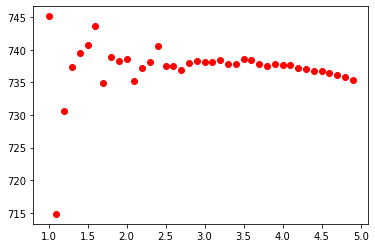

In [15]:
fig, ax = plt.subplots()
ax.scatter(bins,test2[1],label="charge_changing 2198",color='red',marker="o")